## **Data Loading & Exploration**

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('owid-covid-data.csv')

# checking columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
# checking rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [12]:
# Identifying missing values:
df.isnull().sum()

iso_code                                       0
continent                                   3358
location                                       0
date                                           0
total_cases                                   14
                                           ...  
population                                     1
excess_mortality_cumulative_absolute       42497
excess_mortality_cumulative                42497
excess_mortality                           42497
excess_mortality_cumulative_per_million    42497
Length: 67, dtype: int64

## **Data Cleaning**

In [14]:
# Dropping rows with missing values
critical_columns = ['total_cases','population','total_deaths','new_cases']

df_cleaned = df.dropna(subset=critical_columns)

print(df_cleaned.isnull().sum())

iso_code                                       0
continent                                   3348
location                                       0
date                                           0
total_cases                                    0
                                           ...  
population                                     0
excess_mortality_cumulative_absolute       42481
excess_mortality_cumulative                42481
excess_mortality                           42481
excess_mortality_cumulative_per_million    42481
Length: 67, dtype: int64


In [19]:
# Converting date column to datetime
df['date'] = pd.to_datetime(df['date'])
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43601,BOL,South America,Bolivia,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,25.383,1.1,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN
43602,BOL,South America,Bolivia,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,25.383,1.1,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN
43603,BOL,South America,Bolivia,2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,25.383,1.1,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN
43604,BOL,South America,Bolivia,2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,25.383,1.1,71.51,0.718,12224114.0,NaN,NaN,NaN,NaN


In [22]:
# Handling missing numeric values
df.fillna('-', inplace=True)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,-,0.0,0.0,-,...,-,37.746,0.5,64.83,0.511,41128772.0,-,-,-,-
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,-,0.0,0.0,-,...,-,37.746,0.5,64.83,0.511,41128772.0,-,-,-,-
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,-,0.0,0.0,-,...,-,37.746,0.5,64.83,0.511,41128772.0,-,-,-,-
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,-,0.0,0.0,-,...,-,37.746,0.5,64.83,0.511,41128772.0,-,-,-,-
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,-,0.0,0.0,-,...,-,37.746,0.5,64.83,0.511,41128772.0,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43601,BOL,South America,Bolivia,2020-03-08,0.0,0.0,0.0,0.0,0.0,0.0,...,-,25.383,1.1,71.51,0.718,12224114.0,-,-,-,-
43602,BOL,South America,Bolivia,2020-03-09,0.0,0.0,0.0,0.0,0.0,0.0,...,-,25.383,1.1,71.51,0.718,12224114.0,-,-,-,-
43603,BOL,South America,Bolivia,2020-03-10,0.0,0.0,0.0,0.0,0.0,0.0,...,-,25.383,1.1,71.51,0.718,12224114.0,-,-,-,-
43604,BOL,South America,Bolivia,2020-03-11,0.0,0.0,0.0,0.0,0.0,0.0,...,-,25.383,1.1,71.51,0.718,12224114.0,-,-,-,-


In [34]:
#  FIltering countries
# Filter for multiple countries using a regex pattern
countries_pattern = 'Bolivia|Azerbaijan|Afghanistan|Bahrain'

filtered_df = df[df['location'].str.contains(countries_pattern, case=False, na=False)]
print(filtered_df)

      iso_code      continent     location       date total_cases new_cases  \
0          AFG           Asia  Afghanistan 2020-01-05         0.0       0.0   
1          AFG           Asia  Afghanistan 2020-01-06         0.0       0.0   
2          AFG           Asia  Afghanistan 2020-01-07         0.0       0.0   
3          AFG           Asia  Afghanistan 2020-01-08         0.0       0.0   
4          AFG           Asia  Afghanistan 2020-01-09         0.0       0.0   
...        ...            ...          ...        ...         ...       ...   
43601      BOL  South America      Bolivia 2020-03-08         0.0       0.0   
43602      BOL  South America      Bolivia 2020-03-09         0.0       0.0   
43603      BOL  South America      Bolivia 2020-03-10         0.0       0.0   
43604      BOL  South America      Bolivia 2020-03-11         0.0       0.0   
43605      BOL  South America      Bolivia 2020-03-12         0.0       0.0   

      new_cases_smoothed total_deaths new_deaths ne

In [33]:
df.columns

print(df['location'][25500:30000])

25500    Azerbaijan
25501    Azerbaijan
25502    Azerbaijan
25503    Azerbaijan
25504    Azerbaijan
            ...    
29995       Bahrain
29996       Bahrain
29997       Bahrain
29998       Bahrain
29999       Bahrain
Name: location, Length: 4500, dtype: object


## **Exploratory Data Analysis (EDA)**

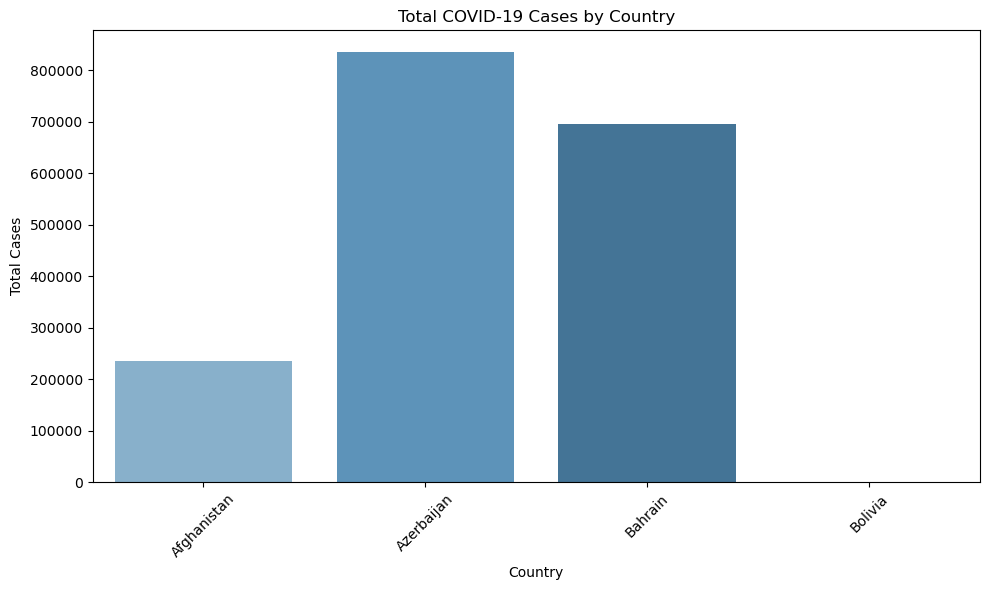

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

countries = ['Bolivia','Azerbaijan', 'Afghanistan','Bahrain']
filtered_df = df[df['location'].isin(countries)]


# Filtered dataset
filtered_df = df[df['location'].isin(countries)]

# the latest total cases per country
latest_df = filtered_df.groupby('location')['total_cases'].max().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='total_cases', data=latest_df, palette='Blues_d')

# Customize plot
plt.title('Total COVID-19 Cases by Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


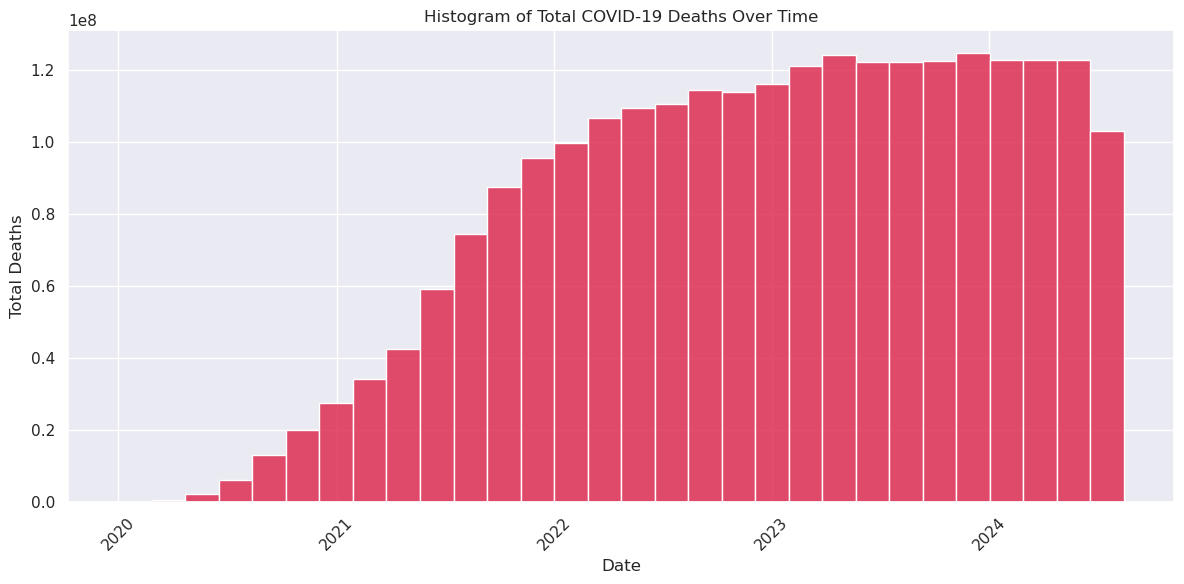

In [46]:
# Deaths overtime

df_cleaned['total_deaths'] = pd.to_numeric(df_cleaned['total_deaths'], errors='coerce')

daily_deaths = df_cleaned.groupby('date')['total_deaths'].sum().reset_index()

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=daily_deaths, x='date', weights='total_deaths', bins=30, color='crimson')

plt.title('Histogram of Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# List all columns that contain the word 'vaccin'
vaccination_columns = [col for col in df.columns if 'vaccin' in col.lower()]
print(vaccination_columns)


['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']


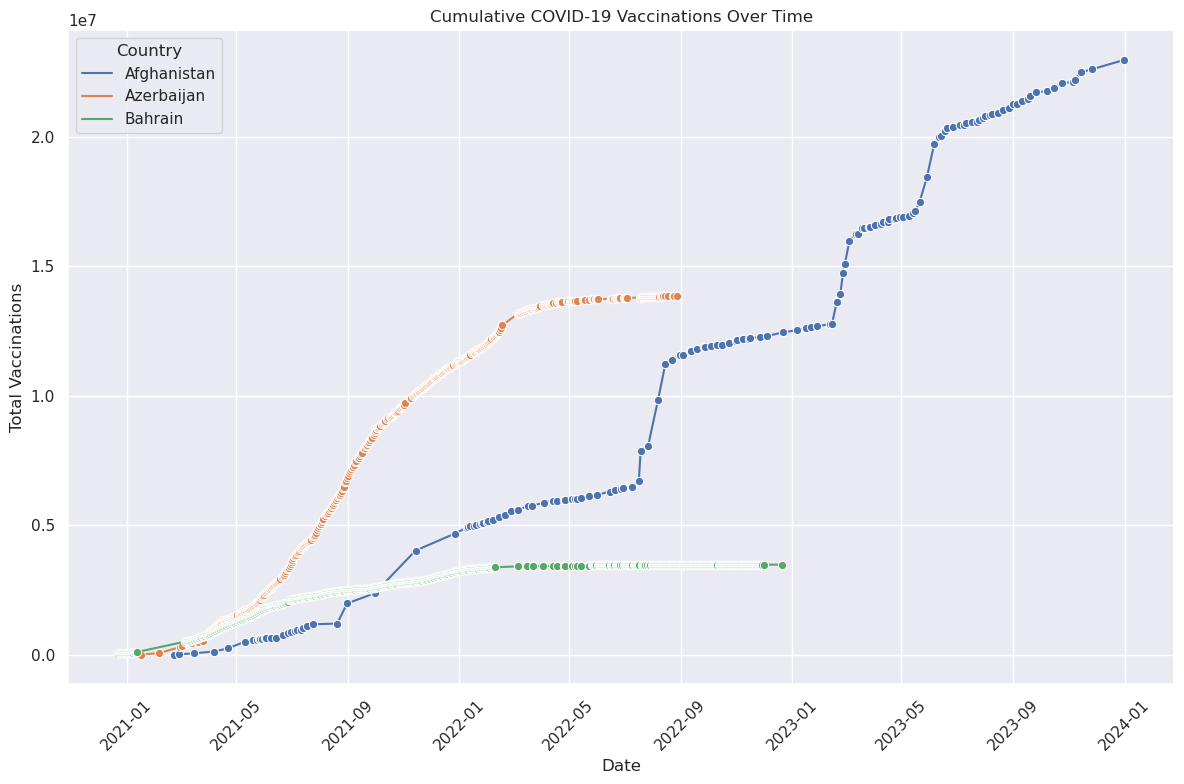

In [75]:


# List of countries for filtering
countries = ['Bolivia', 'Azerbaijan', 'Afghanistan', 'Bahrain']

# Filter the dataset to include only selected countries
filtered_df = df[df['location'].isin(countries)].copy()

# Ensure 'date' column is datetime type for proper plotting
filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')  # Convert invalid dates to NaT

# Convert total_vaccinations to numeric (handle errors in case of non-numeric values)
filtered_df['total_vaccinations'] = pd.to_numeric(filtered_df['total_vaccinations'], errors='coerce')

# Remove rows with NaN values in 'date' or 'total_vaccinations'
filtered_df = filtered_df.dropna(subset=['date', 'total_vaccinations'])

# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=filtered_df, x='date', y='total_vaccinations', hue='location', marker='o')

# Customize plot
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country', loc='upper left')
plt.show()


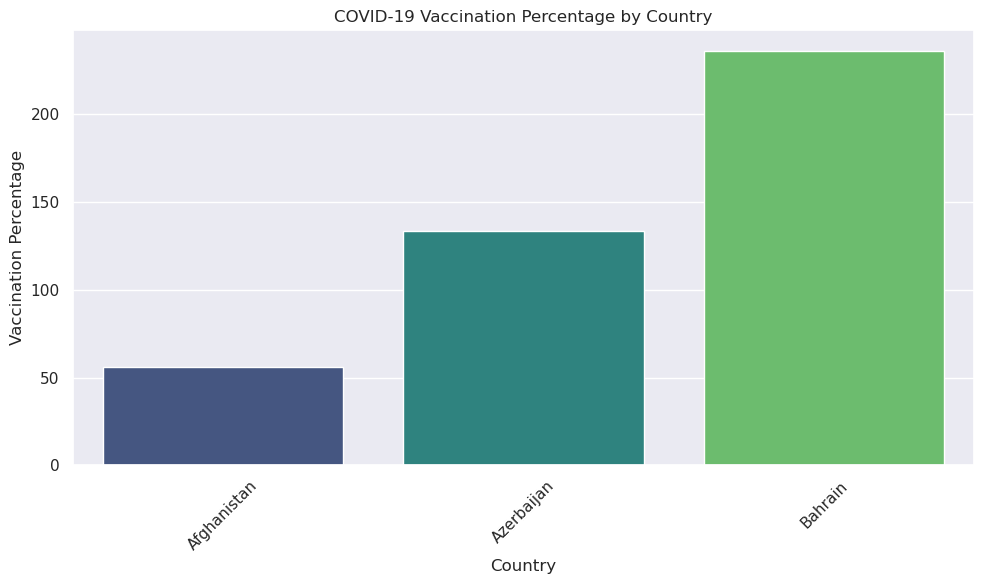

In [77]:
# Calculate percentage of vaccinated population
filtered_df['vaccination_percentage'] = (filtered_df['total_vaccinations'] / filtered_df['population']) * 100

# Get the latest vaccination percentage per country
latest_vaccination_df = filtered_df.groupby('location')['vaccination_percentage'].max().reset_index()

# Plot the vaccination percentage comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='vaccination_percentage', data=latest_vaccination_df, palette='viridis')

# Customize plot
plt.title('COVID-19 Vaccination Percentage by Country')
plt.xlabel('Country')
plt.ylabel('Vaccination Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
